In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
oc_data = pd.read_csv("D:/SASTRA_AI_DS/MIni_project/Ovarian_Diseases/dataset/Org_dataset.csv")

In [13]:
oc_data.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,1,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,2,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,NaN,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,3,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.60,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0


In [14]:
data = oc_data.drop(columns="SUBJECT_ID",axis=1)

In [15]:
data.columns

Index(['AFP', 'AG', 'Age', 'ALB', 'ALP', 'ALT', 'AST', 'BASO#', 'BASO%', 'BUN',
       'Ca', 'CA125', 'CA19-9', 'CA72-4', 'CEA', 'CL', 'CO2CP', 'CREA', 'DBIL',
       'EO#', 'EO%', 'GGT', 'GLO', 'GLU.', 'HCT', 'HE4', 'HGB', 'IBIL', 'K',
       'LYM#', 'LYM%', 'MCH', 'MCV', 'Menopause', 'Mg', 'MONO#', 'MONO%',
       'MPV', 'Na', 'NEU', 'PCT', 'PDW', 'PHOS', 'PLT', 'RBC', 'RDW', 'TBIL',
       'TP', 'UA', 'TYPE'],
      dtype='object')

In [16]:
data.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,327.000000,348.000000,349.000000,339.000000,339.000000,339.000000,339.000000,349.000000,349.000000,349.000000,349.000000,332.000000,325.000000,109.000000,327.000000,349.000000,348.000000,349.000000,339.000000,349.000000,349.000000,339.000000,339.000000,349.000000,349.000000,329.000000,349.000000,339.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,347.000000,349.000000,258.000000,347.000000,347.000000,349.000000,349.000000,349.000000,349.000000,339.000000,339.000000,349.000000,349.000000
mean,11.822875,19.320517,45.051576,41.076991,77.085546,18.011799,19.106195,0.028883,0.479771,4.011117,2.390630,350.382681,46.733938,10.173394,3.309083,100.812894,24.277874,64.250143,3.128614,0.066017,1.119112,21.312684,30.176696,5.334986,0.383874,183.948967,125.336103,5.961062,4.386447,1.557593,26.070831,28.777192,88.070201,0.340974,0.982693,0.355158,5.579083,10.039481,140.494842,66.575543,0.251458,14.330490,1.120602,255.432665,4.359513,13.549914,9.089676,71.078761,243.706590,0.510029
std,98.231126,4.348675,15.130949,5.686780,44.375700,11.243664,8.495069,0.020890,0.346230,1.285569,0.364975,796.488080,125.905844,25.232650,11.037197,2.985526,2.687284,11.714643,1.434953,0.067704,1.134829,18.170043,4.545036,1.215904,0.042177,380.372693,15.534192,2.953268,0.396798,0.561449,10.386006,2.569315,6.041754,0.474717,0.123643,0.150504,1.924260,1.738808,2.860347,11.612845,0.085308,3.000556,0.187649,95.241974,0.465894,1.802818,4.164891,7.365056,68.581936,0.500617
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,0.920000,3.750000,0.600000,0.200000,0.200000,84.600000,16.200000,38.200000,0.900000,0.000000,0.000000,4.000000,14.100000,3.570000,0.224000,16.710000,61.800000,1.000000,3.080000,0.350000,3.900000,17.700000,61.000000,0.000000,0.650000,0.070000,0.300000,5.060000,125.100000,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000,0.000000
25%,1.620000,17.287500,33.000000,38.300000,60.000000,11.000000,13.500000,0.010000,0.200000,3.160000,2.320000,19.160000,7.810000,1.060000,0.830000,99.200000,22.400000,56.000000,2.200000,0.020000,0.300000,12.000000,27.000000,4.660000,0.362000,42.200000,119.000000,4.000000,4.150000,1.190000,18.400000,28.000000,85.600000,0.000000,0.900000,0.250000,4.400000,9.090000,138.900000,58.755000,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.200000,67.450000,200.100000,0.000000
50%,2.280000,19.850000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,2.470000,44.675000,14.200000,2.370000,1.330000,100.900000,24.050000,63.300000,2.800000,0.050000,0.800000,16.000000,30.100000,5.080000,0.388000,53.270000,127.000000,5.400000,4.370000,1.500000,26.600000,29.300000,89.000000,0.000000,0.970000,0.320000,5.430000,10.300000,140.500000,66.750000,0.240000,13.700000,1.120000,236.000000,4.370000,13.100000,8.400000,72.500000,235.400000,1.000000
75%,3.455000,22.177500,57.000000,45.300000,87.000000,21.000000,22.000000,0.040000,0.700000,4.780000,2.580000,248.075000,30.940000,6.420000,2.065000,102.600000,26.025000,71.000000,3.700000,0.090000,1.500000,23.000000,32.800000,5.600000,0.410000,130.600000,135.000000,7.300000,4.650000,1.870000,32.800000,30.400000,91.500000,1.000000,1.050000,0.430000,6.550000,11.200000,142.400000,74.975000,0.300000,16.850000,1.240000,292.000000,4.660000,14.400000,10.750000,75.950000,276.600000,1.000000
max,1210.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,2.830000,5000.000000,1000.000000,158.500000,138.800000,109.400000,34.300000,114.000000,12.100000,0.400000,7.600000,176.000000,47.600000,12.440000,0.569000,3537.600000,189.000000,28.400000,5.400000,3.490000,51.600000,36.80000

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AFP        327 non-null    float64
 1   AG         348 non-null    float64
 2   Age        349 non-null    int64  
 3   ALB        339 non-null    float64
 4   ALP        339 non-null    float64
 5   ALT        339 non-null    float64
 6   AST        339 non-null    float64
 7   BASO#      349 non-null    float64
 8   BASO%      349 non-null    float64
 9   BUN        349 non-null    float64
 10  Ca         349 non-null    float64
 11  CA125      332 non-null    float64
 12  CA19-9     325 non-null    float64
 13  CA72-4     109 non-null    float64
 14  CEA        327 non-null    float64
 15  CL         349 non-null    float64
 16  CO2CP      348 non-null    float64
 17  CREA       349 non-null    float64
 18  DBIL       339 non-null    float64
 19  EO#        349 non-null    float64
 20  EO%       

In [18]:
data.shape

(349, 50)

Spliting the dataset with the Menopause {1:Postmenopause, 0:Premenopause}

In [19]:
data_menopause_1 = data[data['Menopause']==1]
data_menopause_0 = data[data['Menopause']==0]

In [20]:
data_menopause_1.shape

(119, 50)

In [24]:
data_menopause_1.to_csv('D:/SASTRA_AI_DS/MIni_project/Ovarian_Diseases/dataset/data_post_meno.csv', index=False)

In [3]:
post_data = pd.read_csv("D:/SASTRA_AI_DS/MIni_project/Ovarian_Diseases/dataset/data_post_meno.csv")

In [4]:
post_data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,...,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,...,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
1,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,...,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
2,3.03,24.05,76,50.4,76.0,16.0,23.0,0.04,0.50,5.05,...,0.24,15.1,1.17,205,4.61,12.8,7.4,77.0,334.2,0
3,4.00,23.29,63,44.6,71.0,14.0,23.0,0.01,0.20,4.90,...,0.19,8.8,1.38,215,3.95,14.9,6.1,69.8,325.2,0
4,NaN,16.06,65,45.6,130.0,32.0,16.0,0.04,0.70,2.25,...,0.30,10.4,1.04,306,4.33,12.3,4.4,79.6,234.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,3.27,19.62,65,41.3,73.0,16.0,23.0,0.03,0.70,5.23,...,0.20,10.2,1.10,200,4.55,13.5,9.1,74.4,294.0,1
115,5.84,22.80,50,45.4,55.0,18.0,19.0,0.06,0.60,5.49,...,0.24,13.1,1.11,214,3.89,11.8,10.7,70.9,266.7,1
116,4.89,9.50,67,44.0,76.0,13.0,24.0,0.04,0.60,5.86,...,0.18,17.6,1.24,141,4.59,13.6,9.2,74.9,240.3,1
117,7.43,7.10,58,45.7,83.0,12.0,14.0,0.01,0.20,5.31,...,0.22,16.9,0.93,187,5.10,12.4,10.8,79.9,373.4,1


In [6]:
post_data.to_csv('D:/SASTRA_AI_DS/MIni_project/Ovarian_Cancer_Diagnosis/Notebook/Spliting_data/data_post_meno_without_pre.csv')

In [27]:
data_menopause_0.shape

(230, 50)

In [28]:
data_menopause_0.to_csv("D:/SASTRA_AI_DS/MIni_project/Ovarian_Diseases/dataset/data_pre_meno.csv", index=False)

Preprocessing the data


In [9]:
import numpy as np
import pandas as pd

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Scaling the data
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import *
from imblearn.metrics import *

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import RFECV

In [10]:
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_row',None)

In [21]:
data

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.42,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,NaN,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0,0.78,0.22,5.70,11.70,141.3,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4,0
1,34.24,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,NaN,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.10,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1,0.82,0.41,5.50,10.00,142.0,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2,0
2,1.50,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,NaN,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.56,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0,1.00,0.25,5.40,11.40,138.9,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2,0
3,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.60,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.50,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1,1.11,0.42,6.55,7.38,139.1,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6,0
4,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,NaN,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.90,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0,1.08,0.69,10.00,10.40,141.0,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,NaN,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.45,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0,0.94,0.28,7.30,9.90,140.8,NaN,0.22,10.8,0.99,219,4.56,11.9,10.7,80.4,241.5,1
345,2.00,12.14,37,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,NaN,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.44,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0,0.77,0.32,5.40,11.90,137.1,NaN,0.31,17.3,0.95,262,4.24,17.7,17.2,73.5,240.5,1
346,2.83,19.23,59,45.8,83.0,9.0,16.0,0.02,0.60,4.38,2.65,51.33,2.18,NaN,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13.0,22.6,5.90,0.439,42.65,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1,0.92,0.13,3.90,9.70,144.0,NaN,0.21,10.4,1.00,221,4.89,11.6,13.8,68.4,209.5,1
347,1.84,27.22,30,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,NaN,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.78,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0,1.02,0.43,4.10,10.50,139.2,NaN,0.42,13.4,1.31,398,5.35,12.5,11.3,76.0,285.7,1


In [22]:
data.shape

(349, 50)

In [23]:
data.isnull().sum()

AFP           22
AG             1
Age            0
ALB           10
ALP           10
ALT           10
AST           10
BASO#          0
BASO%          0
BUN            0
Ca             0
CA125         17
CA19-9        24
CA72-4       240
CEA           22
CL             0
CO2CP          1
CREA           0
DBIL          10
EO#            0
EO%            0
GGT           10
GLO           10
GLU.           0
HCT            0
HE4           20
HGB            0
IBIL          10
K              0
LYM#           0
LYM%           0
MCH            0
MCV            0
Menopause      0
Mg             0
MONO#          0
MONO%          0
MPV            2
Na             0
NEU           91
PCT            2
PDW            2
PHOS           0
PLT            0
RBC            0
RDW            0
TBIL          10
TP            10
UA             0
TYPE           0
dtype: int64

MICE imputation

In [24]:
miice_imputer = IteratveImputer(random_state=42)
whole_data_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(data), columns=data.columns)

In [25]:
whole_data_mice_imputed

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47.0,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.420000,1.40,107.4,19.9,103.0,2.0,0.04,1.00,16.0,28.5,4.67,0.273,259.663062,89.0,3.5,5.36,0.65,16.8,33.7,103.4,0.0,0.78,0.22,5.70,11.70,141.3,76.200000,0.09,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4,0.0
1,34.24,23.98,61.0,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,2444.00,19.98,44.273485,2.46,100.1,22.3,45.0,2.6,0.04,0.50,13.0,32.1,10.50,0.417,934.100000,128.0,4.2,4.38,1.27,17.2,26.2,85.3,1.0,0.82,0.41,5.50,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,0.0
2,1.50,18.40,39.0,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,56.08,12.18,5.205010,0.77,102.6,22.2,48.0,4.7,0.03,0.60,10.0,32.5,4.64,0.391,47.560000,131.0,10.1,4.30,1.10,23.7,28.4,84.6,0.0,1.00,0.25,5.40,11.40,138.9,69.700000,0.13,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2,0.0
3,2.75,16.60,45.0,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,2555.00,18.41,131.600000,0.82,103.2,24.0,65.7,2.9,0.00,0.07,17.0,26.9,4.76,0.372,853.500000,123.0,8.0,4.70,1.73,27.2,30.6,92.6,1.0,1.11,0.42,6.55,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,0.0
4,2.36,19.97,45.0,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,1391.00,11.15,26.758954,0.42,99.6,26.2,70.3,2.2,0.11,1.60,24.0,31.5,4.07,0.383,404.900000,122.0,3.1,4.77,1.98,28.8,27.7,87.0,0.0,1.08,0.69,10.00,10.40,141.0,59.500000,0.28,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52.0,48.6,65.0,40.0,30.0,0.00,0.00,4.29,2.81,50.80,15.11,4.435316,1.74,98.1,25.9,54.0,3.8,0.01,0.30,36.0,31.8,5.13,0.415,31.450000,142.0,6.9,4.11,1.18,30.7,31.1,91.0,0.0,0.94,0.28,7.30,9.90,140.8,61.703680,0.22,10.8,0.99,219.0,4.56,11.9,10.7,80.4,241.5,1.0
345,2.00,12.14,37.0,46.1,49.0,9.0,20.0,0.00,0.00,3.12,2.29,21.93,0.62,3.688458,1.67,103.6,25.0,67.0,5.9,0.02,0.30,9.0,27.4,4.59,0.285,44.440000,80.0,11.3,3.64,1.39,23.3,18.9,67.2,0.0,0.77,0.32,5.40,11.90,137.1,70.985385,0.31,17.3,0.95,262.0,4.24,17.7,17.2,73.5,240.5,1.0
346,2.83,19.23,59.0,45.8,83.0,9.0,16.0,0.02,0.60,4.38,2.65,51.33,2.18,4.478130,2.31,102.3,27.1,50.0,4.0,0.05,1.50,13.0,22.6,5.90,0.439,42.650000,144.0,9.8,4.63,1.10,32.7,29.4,89.8,1.0,0.92,0.13,3.90,9.70,144.0,61.301388,0.21,10.4,1.00,221.0,4.89,11.6,13.8,68.4,209.5,1.0
347,1.84,27.22,30.0,47.8,64.0,26.0,22.0,0.03,0.30,3.61,2.82,53.87,10.71,3.454727,0.93,93.1,23.1,59.0,3.5,0.23,2.20,25.0,28.2,5.59,0.458,30.780000,154.0,7.8,4.22,2.15,20.6,28.8,85.6,0.0,1.02,0.43,4.10,10.50,139.2,72.796501,0.42,13.4,1.31,398.0,5.35,12.5,11.3,76.0,285.7,1.0


In [26]:
whole_data_mice_imputed.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,11.868037,19.318251,45.051576,41.063281,77.008575,17.960899,19.062221,0.028883,0.479771,4.011117,2.390630,361.200067,48.068649,9.542205,3.346878,100.812894,24.273078,64.250143,3.128614,0.066017,1.119112,21.224142,30.148559,5.334986,0.383874,189.827195,125.336103,5.961062,4.386447,1.557593,26.070831,28.777192,88.070201,0.340974,0.982693,0.355158,5.579083,10.042706,140.494842,66.753939,0.251366,14.332859,1.120602,255.432665,4.359513,13.549914,9.089676,71.031009,243.706590,0.510029
std,95.076559,4.342629,15.130949,5.613164,43.736378,11.099230,8.383282,0.020890,0.346230,1.285569,0.364975,781.639937,121.845177,17.212821,10.687566,2.985526,2.684916,11.714643,1.414186,0.067704,1.134829,17.919849,4.490840,1.215904,0.042177,374.112732,15.534192,2.910527,0.396798,0.561449,10.386006,2.569315,6.041754,0.474717,0.123643,0.150504,1.924260,1.734358,2.860347,11.541205,0.085071,2.992111,0.187649,95.241974,0.465894,1.802818,4.104614,7.269721,68.581936,0.500617
min,0.610000,6.200000,15.000000,22.000000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,0.920000,3.750000,0.600000,0.200000,0.200000,84.600000,16.200000,38.200000,0.900000,0.000000,0.000000,4.000000,14.100000,3.570000,0.224000,14.923059,61.800000,1.000000,3.080000,0.350000,3.900000,17.700000,61.000000,0.000000,0.650000,0.070000,0.300000,5.060000,125.100000,37.200000,0.070000,8.800000,0.570000,74.000000,2.620000,10.920000,2.500000,32.900000,96.000000,0.000000
25%,1.670000,17.300000,33.000000,38.400000,60.000000,11.000000,14.000000,0.010000,0.200000,3.160000,2.320000,20.320000,8.310000,3.467730,0.850000,99.200000,22.400000,56.000000,2.200000,0.020000,0.300000,12.000000,27.100000,4.660000,0.362000,42.520000,119.000000,4.000000,4.150000,1.190000,18.400000,28.000000,85.600000,0.000000,0.900000,0.250000,4.400000,9.100000,138.900000,59.004470,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.300000,67.500000,200.100000,0.000000
50%,2.420000,19.820000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,2.470000,49.280000,15.110000,4.251061,1.390000,100.900000,24.000000,63.300000,2.900000,0.050000,0.800000,16.000000,29.900000,5.080000,0.388000,54.150000,127.000000,5.500000,4.370000,1.500000,26.600000,29.300000,89.000000,0.000000,0.970000,0.320000,5.430000,10.300000,140.500000,66.400000,0.240000,13.800000,1.120000,236.000000,4.370000,13.100000,8.600000,72.283014,235.400000,1.000000
75%,3.770000,22.160000,57.000000,45.100000,86.000000,20.565482,22.000000,0.040000,0.700000,4.780000,2.580000,294.800000,37.270000,8.802874,2.280000,102.600000,26.000000,71.000000,3.700000,0.090000,1.500000,23.000000,32.800000,5.600000,0.410000,154.800000,135.000000,7.200000,4.650000,1.870000,32.800000,30.400000,91.500000,1.000000,1.050000,0.430000,6.550000,11.200000,142.400000,75.000000,0.300000,16.800000,1.240000,292.000000,4.660000,14.400000,10.700000,75.800000,276.600000,1.000000
max,1210.000000,33.330000,83.000000,51.500000,763.000000,86.000000,78.000000,0.120000,1.940000,10.190000,2.830000,5000.000000,1000.000000,158.500000,138.800000,109.400000,34.300000,114.000000,12.100000,0.400000,7.600000,176.000000,47.600000,12.440000,0.569000,3537.600000,189.000000,28.400000,5.400000,3.490000,51.600000,36.800000

Outliered

In [27]:
def remove_outliers_iqr(df):
    """
    Detect and truncate outliers using IQR method.
    Any value beyond 1.5 * IQR from the lower or upper quartile is considered an outlier
    and will be truncated to the respective bounds.
    """
    # Create a copy of the dataset
    df_outliers_removed = df.copy()

    for column in df_outliers_removed.select_dtypes(include=[np.number]):  # Process only numeric columns
        Q1 = df_outliers_removed[column].quantile(0.25)  # 25th percentile (lower quartile)
        Q3 = df_outliers_removed[column].quantile(0.75)  # 75th percentile (upper quartile)
        IQR = Q3 - Q1  # Inter-quartile range

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Truncate the outliers to the lower or upper bounds
        df_outliers_removed[column] = np.where(df_outliers_removed[column] < lower_bound, 
                                               lower_bound, 
                                               df_outliers_removed[column])
        df_outliers_removed[column] = np.where(df_outliers_removed[column] > upper_bound, 
                                               upper_bound, 
                                               df_outliers_removed[column])
    return df_outliers_removed

In [28]:
whole_outliered_data_iqr = remove_outliers_iqr(whole_data_mice_imputed)

In [29]:
whole_outliered_data_iqr

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
0,3.58,19.36,47.0,45.4,56.0,11.000000,24.0,0.01,0.30,5.35,2.48,15.36,36.48,6.420000,1.40,107.4,19.9,93.5,2.0,0.040,1.00,16.0,28.5,4.67,0.290,259.663062,95.0,3.5,5.36,0.65,16.8,33.7,100.35,0.0,0.78,0.22,5.700,11.70,141.3,76.200000,0.09,13.4,1.46,74.0,3.285,13.7,5.5,73.9,391.35,0.0
1,6.92,23.98,61.0,39.9,95.0,9.000000,13.0,0.02,0.30,3.21,2.62,706.52,19.98,16.805590,2.46,100.1,22.3,45.0,2.6,0.040,0.50,13.0,32.1,7.01,0.417,323.220000,128.0,4.2,4.38,1.27,17.2,26.2,85.30,1.0,0.82,0.41,5.500,10.00,142.0,76.500000,0.30,11.2,1.09,304.0,4.890,12.7,6.8,72.0,119.20,0.0
2,1.50,18.40,39.0,45.4,77.0,9.000000,18.0,0.03,0.60,3.80,2.57,56.08,12.18,5.205010,0.77,102.6,22.2,48.0,4.7,0.030,0.60,10.0,32.5,4.64,0.391,47.560000,131.0,10.1,4.30,1.10,23.7,28.4,84.60,0.0,1.00,0.25,5.400,11.40,138.9,69.700000,0.13,15.2,0.97,112.0,4.620,12.0,14.8,77.9,209.20,0.0
3,2.75,16.60,45.0,39.2,26.0,16.000000,17.0,0.05,0.74,5.27,2.35,706.52,18.41,16.805590,0.82,103.2,24.0,65.7,2.9,0.000,0.07,17.0,26.9,4.76,0.372,323.220000,123.0,8.0,4.70,1.73,27.2,30.6,92.60,1.0,1.11,0.42,6.550,7.38,139.1,65.500000,0.25,17.4,1.25,339.0,4.010,14.6,10.9,66.1,215.60,0.0
4,2.36,19.97,45.0,35.0,47.0,21.000000,27.0,0.01,0.10,4.89,2.48,706.52,11.15,16.805590,0.42,99.6,26.2,70.3,2.2,0.110,1.60,24.0,31.5,4.07,0.383,323.220000,122.0,3.1,4.77,1.98,28.8,27.7,87.00,0.0,1.08,0.69,9.775,10.40,141.0,59.500000,0.28,11.9,0.94,272.0,4.400,13.4,5.3,66.5,206.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2.09,20.91,52.0,48.6,65.0,34.913706,30.0,0.00,0.00,4.29,2.81,50.80,15.11,4.435316,1.74,98.1,25.9,54.0,3.8,0.010,0.30,36.0,31.8,5.13,0.415,31.450000,142.0,6.9,4.11,1.18,30.7,31.1,91.00,0.0,0.94,0.28,7.300,9.90,140.8,61.703680,0.22,10.8,0.99,219.0,4.560,11.9,10.7,80.4,241.50,1.0
345,2.00,12.14,37.0,46.1,49.0,9.000000,20.0,0.00,0.00,3.12,2.29,21.93,0.62,3.688458,1.67,103.6,25.0,67.0,5.9,0.020,0.30,9.0,27.4,4.59,0.290,44.440000,95.0,11.3,3.64,1.39,23.3,24.4,76.75,0.0,0.77,0.32,5.400,11.90,137.1,70.985385,0.31,17.3,0.95,262.0,4.240,17.4,17.2,73.5,240.50,1.0
346,2.83,19.23,59.0,45.8,83.0,9.000000,16.0,0.02,0.60,4.38,2.65,51.33,2.18,4.478130,2.31,102.3,27.1,50.0,4.0,0.050,1.50,13.0,22.6,5.90,0.439,42.650000,144.0,9.8,4.63,1.10,32.7,29.4,89.80,1.0,0.92,0.13,3.900,9.70,144.0,61.301388,0.21,10.4,1.00,221.0,4.890,11.6,13.8,68.4,209.50,1.0
347,1.84,27.22,30.0,47.8,64.0,26.000000,22.0,0.03,0.30,3.61,2.82,53.87,10.71,3.454727,0.93,94.1,23.1,59.0,3.5,0.195,2.20,25.0,28.2,5.59,0.458,30.780000,154.0,7.8,4.22,2.15,20.6,28.8,85.60,0.0,1.02,0.43,4.100,10.50,139.2,72.796501,0.42,13.4,1.31,398.0,5.350,12.5,11.3,76.0,285.70,1.0


In [30]:
whole_outliered_data_iqr.describe()

,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,CA125,CA19-9,CA72-4,CEA,CL,CO2CP,CREA,DBIL,EO#,EO%,GGT,GLO,GLU.,HCT,HE4,HGB,IBIL,K,LYM#,LYM%,MCH,MCV,Menopause,Mg,MONO#,MONO%,MPV,Na,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,TYPE
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.00000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,2.980372,19.402635,45.051576,41.139068,74.475623,17.009159,18.463367,0.028596,0.477479,3.992292,2.440516,191.214026,26.413898,6.366044,1.763390,100.863610,24.266201,64.122636,3.057124,0.061805,1.051318,18.804371,30.120193,5.208138,0.38437,113.116902,125.760745,5.832409,4.388080,1.549742,26.070831,28.942149,88.371060,0.340974,0.982249,0.351232,5.522593,10.044998,140.531089,66.753939,0.249151,14.332859,1.120172,249.896848,4.360745,13.470974,8.904575,71.291037,241.462464,0.510029
std,1.810323,4.067578,15.130949,5.408268,21.721002,7.858275,6.277831,0.019904,0.338493,1.223846,0.202358,245.418050,25.631313,4.917242,1.192561,2.755344,2.635918,11.313433,1.160192,0.054126,0.916178,9.033452,4.327749,0.785019,0.03918,105.595447,13.849031,2.394524,0.392249,0.539948,10.386006,2.039108,4.879041,0.474717,0.121881,0.138723,1.661336,1.726146,2.673054,11.541205,0.077055,2.992111,0.185255,74.351184,0.423886,1.546033,3.394401,6.435639,60.494917,0.500617
min,0.610000,10.010000,15.000000,28.350000,26.000000,4.000000,7.000000,0.000000,0.000000,1.120000,1.930000,3.750000,0.600000,0.200000,0.200000,94.100000,17.000000,38.200000,0.900000,0.000000,0.000000,4.000000,18.550000,3.570000,0.29000,14.923059,95.000000,1.000000,3.400000,0.350000,3.900000,24.400000,76.750000,0.000000,0.675000,0.070000,1.175000,5.950000,133.650000,37.200000,0.070000,8.800000,0.640000,74.000000,3.285000,10.920000,2.500000,55.050000,96.000000,0.000000
25%,1.670000,17.300000,33.000000,38.400000,60.000000,11.000000,14.000000,0.010000,0.200000,3.160000,2.320000,20.320000,8.310000,3.467730,0.850000,99.200000,22.400000,56.000000,2.200000,0.020000,0.300000,12.000000,27.100000,4.660000,0.36200,42.520000,119.000000,4.000000,4.150000,1.190000,18.400000,28.000000,85.600000,0.000000,0.900000,0.250000,4.400000,9.100000,138.900000,59.004470,0.192000,11.900000,1.000000,202.000000,4.110000,12.400000,6.300000,67.500000,200.100000,0.000000
50%,2.420000,19.820000,45.000000,42.000000,71.000000,15.000000,17.000000,0.030000,0.400000,3.830000,2.470000,49.280000,15.110000,4.251061,1.390000,100.900000,24.000000,63.300000,2.900000,0.050000,0.800000,16.000000,29.900000,5.080000,0.38800,54.150000,127.000000,5.500000,4.370000,1.500000,26.600000,29.300000,89.000000,0.000000,0.970000,0.320000,5.430000,10.300000,140.500000,66.400000,0.240000,13.800000,1.120000,236.000000,4.370000,13.100000,8.600000,72.283014,235.400000,1.000000
75%,3.770000,22.160000,57.000000,45.100000,86.000000,20.565482,22.000000,0.040000,0.700000,4.780000,2.580000,294.800000,37.270000,8.802874,2.280000,102.600000,26.000000,71.000000,3.700000,0.090000,1.500000,23.000000,32.800000,5.600000,0.41000,154.800000,135.000000,7.200000,4.650000,1.870000,32.800000,30.400000,91.500000,1.000000,1.050000,0.430000,6.550000,11.200000,142.400000,75.000000,0.300000,16.800000,1.240000,292.000000,4.660000,14.400000,10.700000,75.800000,276.600000,1.000000
max,6.920000,29.450000,83.000000,51.500000,125.000000,34.913706,34.000000,0.085000,1.450000,7.210000,2.830000,706.520000,80.710000,16.805590,4.425000,107.700000,31.400000,93.500000,5.950000,0.195000,3.300000,39.500000,41.350000,7.010000,0.48200,323.220000,159.000000,12.000000,5.400000,2.890000,51.600000,34.000000,100.350000,1.000000,1.275000

In [31]:
pre_meno = whole_outliered_data_iqr[whole_outliered_data_iqr['Menopause']==0]

In [32]:
post_meno = whole_outliered_data_iqr[whole_outliered_data_iqr['Menopause']==1]

In [48]:
pre_meno.to_csv("data_pre_meno.csv", index=False)

In [33]:
post_meno.to_csv("data_post_meno.csv", index=False)

<Axes: ylabel='CA72-4'>

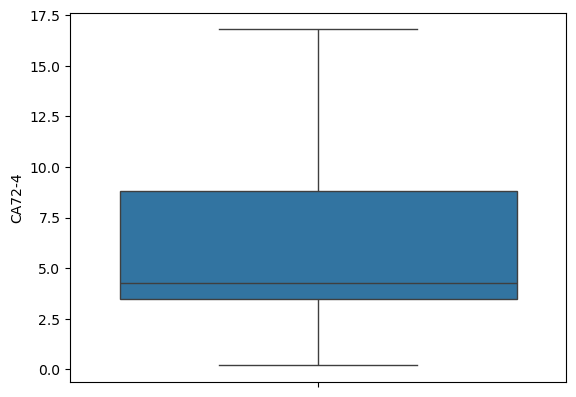

In [51]:
sns.boxplot(whole_outliered_data_iqr['CA72-4'])

<Axes: ylabel='AFP'>

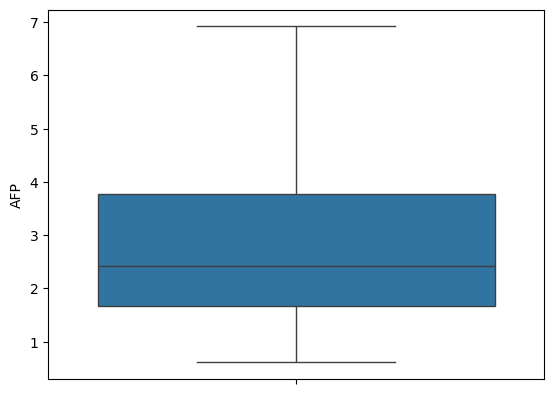

In [34]:
sns.boxplot(whole_outliered_data_iqr['AFP'])